# PyPlot Tutorial
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. 

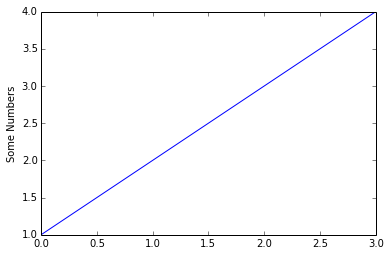

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1, 2, 3, 4])
plt.ylabel('Some Numbers')

matplotlib takes x axis itself starting from '0'.

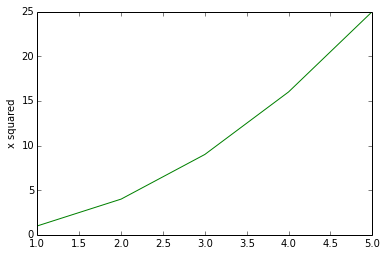

In [2]:
# plt.plot(x_vales, y_values)
# For every x, y pair of arguments, there is an optional third argument 
# which is the format string that indicates the color and line type of the plot.
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25], 'g-')
plt.ylabel('x squared')

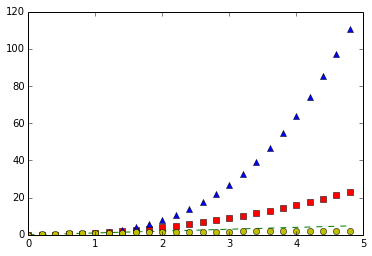

In [3]:
import numpy as np

# even spaced numpy array
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'g--', t, t**2, 'rs', t, t**3, 'b^', t, t**0.5, 'yo')

### Controlling line properties
Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. There are several ways to set line properties

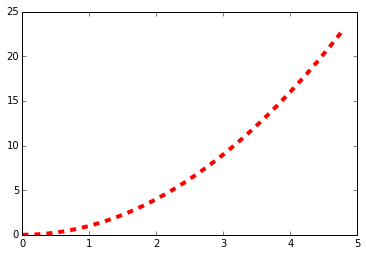

In [4]:
# Use keyword args
plt.plot(t, t**2, 'r--', linewidth = 4.0)

* Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list.

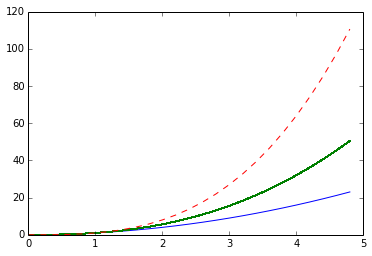

In [5]:
line1, line2, line3 = plt.plot(t, t**2, t, t**2.5, t, t**3, 'r--')
line2.set_antialiased(False) # turn off antialising
# check difference between both lines

* Use the setp() command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs.

[None, None, None, None]

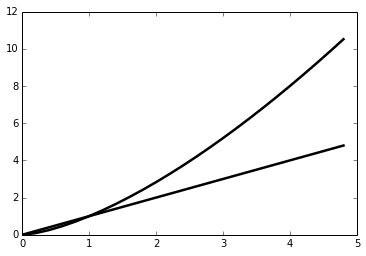

In [6]:
lines = plt.plot(t, t, t, t**1.5)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'k', 'linewidth', 2.5)

To get a list of settable line properties, call the setp() function with a line or lines as argument

In [7]:
plt.setp(lines)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque)         
  animated: [True | False]         
  antialiased or aa: [True | False]         
  axes: an :class:`~matplotlib.axes.Axes` instance         
  clip_box: a :class:`matplotlib.transforms.Bbox` instance         
  clip_on: [True | False]         
  clip_path: [ (:class:`~matplotlib.path.Path`,         :class:`~matplotlib.transforms.Transform`) |         :class:`~matplotlib.patches.Patch` | None ]         
  color or c: any matplotlib color         
  contains: a callable function         
  dash_capstyle: ['butt' | 'round' | 'projecting']         
  dash_joinstyle: ['miter' | 'round' | 'bevel']         
  dashes: sequence of on/off ink in points         
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' |                   'steps-post']         
  figure: a :class:`matplotlib.figure.Figure` instance         
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none']         
  gid: an 

### Working with multiple figures and axes
MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

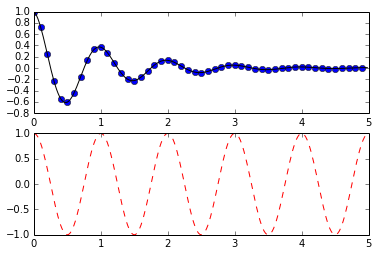

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

You can create multiple figures by using multiple figure() calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

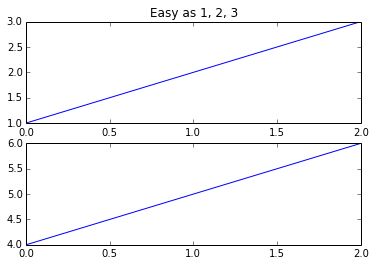

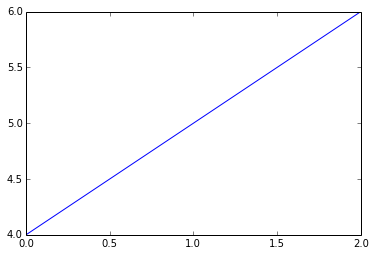

In [9]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

### Working with text
The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the indicated locations (see Text introduction for a more detailed example)

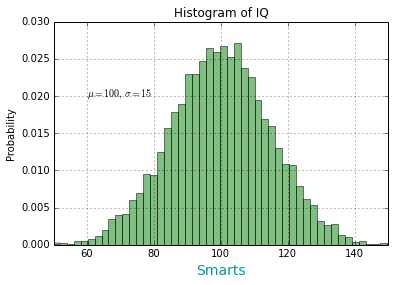

In [10]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.5) #alpha 0 - 1, 'transperancy'


plt.xlabel('Smarts', fontsize=14, color='#009999')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .020, r'$\mu=100,\ \sigma=15$')
plt.axis([50, 150, 0, 0.03]) # axis(x_min, x_max, y_min, y_max)
plt.grid(True)

### Annotating text
The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

(-2, 2)

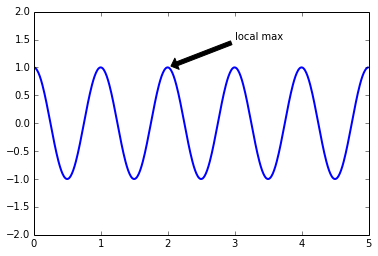

In [11]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5a368ddc90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5a36698fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5a368e3950>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5a368e3310>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5a36698690>,
  <matplotlib.lines.Line2D at 0x7f5a36899e10>]}

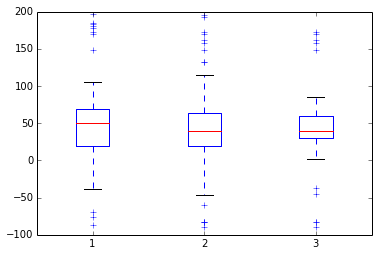

In [13]:
data = np.concatenate((spread, center, flier_high, flier_low), 0)
# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)